[[304 180]
 [343 174]
 [221   8]
 [ 53 122]
 [283 278]
 [396 410]
 [293 257]
 [187 213]
 [322 162]
 [278 382]]
[[292.00800377 181.76741996]
 [403.28136882 213.57034221]
 [174.19172598  51.81450178]
 [ 78.91816143 103.70179372]
 [265.30245902 288.8852459 ]
 [434.23599321 372.98787291]
 [285.99673948 244.31333551]
 [197.17706518 233.31648658]
 [314.45225464 154.56763926]
 [248.2411596  390.73781459]]
[[293.1884058  186.3682233 ]
 [496.02807775 262.0399568 ]
 [175.03897791  53.44911217]
 [ 78.91816143 103.70179372]
 [265.22723527 297.03976102]
 [426.4662237  387.25276855]
 [286.62496571 245.12510288]
 [198.77923422 237.65056916]
 [315.91443501 161.94252123]
 [243.82499045 402.12571647]]
[[289.53185438 188.71956769]
 [496.22119205 279.46887417]
 [175.12240484  53.52811419]
 [ 79.07158837 103.83333333]
 [264.34071181 302.23177083]
 [413.07610854 403.01786896]
 [285.83625884 248.03667802]
 [200.12652537 240.67919075]
 [316.32521246 164.91331445]
 [246.10647359 409.21039182]]
[[281.36774554 1

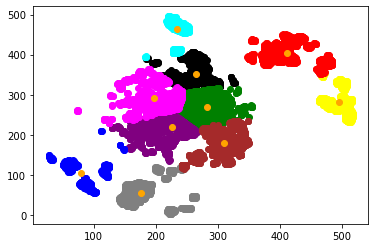

In [ ]:
import wradlib as wrl
import numpy as np
import matplotlib.pyplot as plt

wrl.__version__

#fetching and reading data file from the system
file_path = 'C:/Users/HP/Desktop/Data/BHP190610110229.MAXSU60'
fcontent = wrl.io.read_iris(file_path)

#reading data for a particular elevation and storing it in 'a'
a = fcontent['data'][0][0]
a.shape
#reshaping to convert 3D data into 2D data
a=a.reshape(720,720)

#slicing data to eliminate undesired data points
new_a = a[200:,:520]
for i in range(0,520):
    for j in range(0,520):
        if new_a[i][j] == 95.5:
            new_a[i][j] = -32.

points = []
#k is number of clusters which is equal to 10
k = 10

#append all the points except 95.5 and -32 in 'points' list
for indx,x in enumerate(new_a):
    for indy,y in enumerate(x):
        if y!=95.5 and y!=-32 :
            points.append(list([indx,indy])) 

#defining a function to plot points on the graph
def plotpoints(points,labels,previous_centroids,k):
    color = ['purple','yellow','grey','blue','black','red','green','magenta', 'brown', 'aqua']
    
    for i in range(k):
        x = points[labels==i][:,0]
        y = points[labels==i][:,1]
        plt.scatter(x,y,c=color[i])
  
    for i in previous_centroids:
        plt.scatter(i[0],i[1],c='orange')
    
plt.show()

#converting list into array
new_a = np.array(points)
points = np.array(points)

#selecting k random centroids
np.random.seed(0)
previous_centroids = new_a[np.random.choice(len(new_a), k, replace=False)]
current_centroids = []
labels = []

#performing k-means
while True:
    labels = np.array([np.argmin(np.sqrt(np.sum((previous_centroids - new_a[i])**2, axis=1))) for i in range(len(new_a))])
    
    print(previous_centroids)
    current_centroids = np.array([np.mean(new_a[labels == j], axis=0) for j in range(k)])
   
    if np.all(previous_centroids == current_centroids):
        plotpoints(points,labels,previous_centroids,k)
        break;
    previous_centroids = current_centroids

#dispalying final output     
plt.show()

In [ ]:
 previous_centroids

array([[264.23763492, 272.09809038],
       [440.77890556, 361.85304501],
       [159.15823122,  80.19392648]])